In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from numpy import nan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv("data.csv")

In [7]:
df=pd.DataFrame(data)

we will find the shape of our data

In [4]:
print("shape of data: ",data.shape)

shape of data:  (2227, 3)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [8]:
print("the number of null values: ",df.isna().sum().sum())

the number of null values:  8


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB
None


In [9]:
print("number of null in column 1: ", df['x1'].isna().sum())
print("number of null in column 2: ", df['x2'].isna().sum())
print("number of null in column 3: ", df['y'].isna().sum())

number of null in column 1:  5
number of null in column 2:  3
number of null in column 3:  0


In [11]:
print(df.isnull().sum())

x1    5
x2    3
y     0
dtype: int64


C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1'>

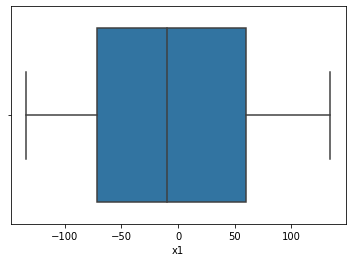

In [13]:
sns.boxplot(df.x1)

C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1', ylabel='Density'>

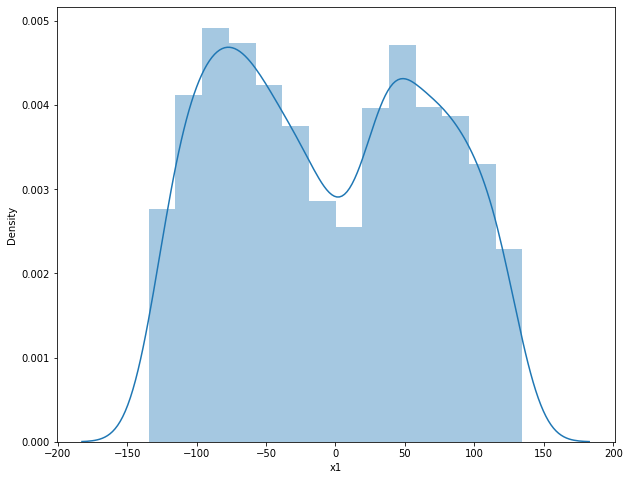

In [14]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df.x1)

In [26]:
df=df.fillna(df.median())

In [27]:
print(df.isnull().sum())

x1    0
x2    0
y     0
dtype: int64


C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1', ylabel='Density'>

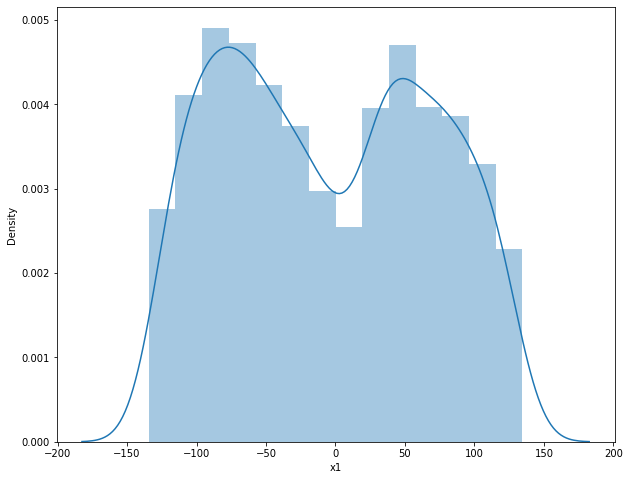

In [28]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df.x1)

treating outliers in the dataset

Text(0.5, 0, 'data')

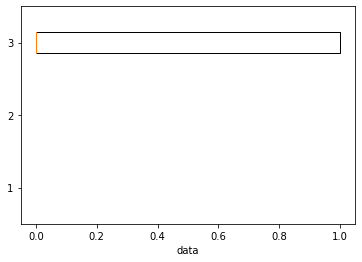

In [29]:
plt.boxplot(data,vert=False)
plt.xlabel("data")

In [39]:
# using z score
l=[]
def fun(data):
    thres=3
    mean=np.mean(data.x1)
    std=np.std(data.x1)
    for i in data.x1:
        z_score=i-mean/std
        if(np.abs(z_score)>-2):
            l.append(i)
sample=fun(data)
print("outliers: ",sample)
print("mean: ",np.mean(data.x1))
print("std: ",np.std(data.x1))

outliers:  None
mean:  -4.818766123605311
std:  74.92304359648789


visualizing the model

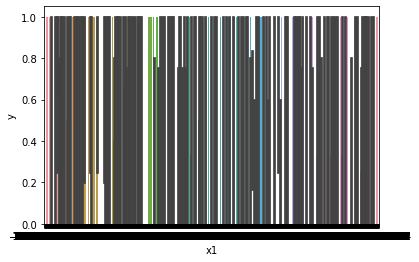

In [45]:
sns.barplot(x="x1",y="y",data=data)
plt.show()

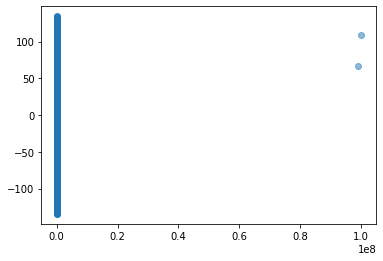

In [49]:
plt.scatter(df['x2'],df['x1'],alpha=0.5)
plt.show()

In [63]:
x=np.asarray(df[['x1','x2']])
y=np.asarray(df['y'])

In [65]:
# normalizee the data 
from sklearn.preprocessing import StandardScaler

In [66]:
x=StandardScaler().fit(x).transform(x)

In [68]:
from sklearn.model_selection import train_test_split

In [80]:
# split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [79]:
x_test

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [81]:
# linear regression model
lr=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)

In [82]:
yhat=lr.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
print("error: ", mean_squared_error(y_test,yhat))
score=accuracy_score(y_test,yhat)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhat))
print("classification_report: ", classification_report(y_test,yhat))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

In [119]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
gcv = GridSearchCV(lr, param_grid, cv = 5)
  
gcv.fit(x_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(gcv.best_params_)) 
print("Best score is {}".format(gcv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.5862275449101796


In [140]:
yhatgcv=gcv.predict(x_test)
print("error: ", mean_squared_error(y_test,yhatgcv))
score=accuracy_score(y_test,yhatgcv)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatgcv))
print("classification_report: ", classification_report(y_test,yhatgcv))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

using SVM

In [90]:
from sklearn import svm

In [91]:
svc=svm.SVC(kernel='linear',C=1.0).fit(x,y)

In [92]:
yhatsvm=svc.predict(x_test)

In [144]:
print("error: ", mean_squared_error(y_test,yhatsvm))
score=accuracy_score(y_test,yhatsvm)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatsvm))
print("classification_report: ", classification_report(y_test,yhatsvm))

error:  0.4578096947935368
score:  0.5421903052064632
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
param_grid = {'C': [1.0], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']}

In [94]:
svk=svm.SVC(kernel='kernel',C=1.0).fit(x,y)

In [95]:
yhatsvk=svk.predict(x_test)

In [105]:
print("error: ", mean_squared_error(y_test,yhatsvk))
score=accuracy_score(y_test,yhatsvk)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatsvk))
print("classification_report: ", classification_report(y_test,yhatsvk))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [141]:
param_grid = {'C': [1.0], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

In [142]:
grid = GridSearchCV(svk, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)
yhatgrid=grid.predict(x_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=1.0, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ........C=1.0, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ........C=1.0, gamma=1, kernel=rbf;, score=0.569 total time=   0.0s
[CV 4/5] END ........C=1.0, gamma=1, kernel=rbf;, score=0.566 total time=   0.0s
[CV 5/5] END ........C=1.0, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 1/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 2/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.599 total time=   0.0s
[CV 3/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 4/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.0s
[CV 5/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 1/5] END .....C=1.0, gamma=0.01, kernel=rbf;, score=0.563 total time=   0.0s
[CV 2/5] END .....C=1.0, gamma=0.01, kernel=rbf;,

Decision Tree Classifier

In [143]:
print("error: ", mean_squared_error(y_test,yhatgrid))
score=accuracy_score(y_test,yhatgrid)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatgrid))
print("classification_report: ", classification_report(y_test,yhatgrid))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

In [107]:
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [109]:
yhatdtc=dtc.predict(x_test)

In [110]:
print("error: ", mean_squared_error(y_test,yhatdtc))
score=accuracy_score(y_test,yhatdtc)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatdtc))
print("classification_report: ", classification_report(y_test,yhatdtc))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

In [114]:
knn=KNeighborsClassifier(n_neighbors=7).fit(x_test,y_test)

In [115]:
yhatknn=knn.predict(x_test)

In [116]:
print("error: ", mean_squared_error(y_test,yhatknn))
score=accuracy_score(y_test,yhatknn)
print("score: ", score)
print("confusion_matrix: ",(y_test,yhatknn))
print("classification_report: ", classification_report(y_test,yhatknn))

error:  0.42190305206463197
score:  0.578096947935368
confusion_matrix:  (array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0

Decision Tree is best of all